# Power Iteration Method

## Introduction

The **Power Iteration** (also known as the power method) is one of the simplest and oldest algorithms for computing the dominant eigenvalue and its corresponding eigenvector of a matrix. Despite its simplicity, it forms the foundation for more sophisticated eigenvalue algorithms and remains relevant in modern applications such as Google's PageRank algorithm.

## Mathematical Foundation

### Eigenvalue Problem

Given a square matrix $\mathbf{A} \in \mathbb{R}^{n \times n}$, the eigenvalue problem seeks scalars $\lambda$ (eigenvalues) and non-zero vectors $\mathbf{v}$ (eigenvectors) satisfying:

$$\mathbf{A}\mathbf{v} = \lambda \mathbf{v}$$

### Dominant Eigenvalue

If $\mathbf{A}$ has eigenvalues $\lambda_1, \lambda_2, \ldots, \lambda_n$ ordered such that:

$$|\lambda_1| > |\lambda_2| \geq |\lambda_3| \geq \cdots \geq |\lambda_n|$$

then $\lambda_1$ is called the **dominant eigenvalue**.

### Algorithm Derivation

Let $\{\mathbf{v}_1, \mathbf{v}_2, \ldots, \mathbf{v}_n\}$ be a basis of eigenvectors for $\mathbb{R}^n$. Any initial vector $\mathbf{x}_0$ can be expressed as:

$$\mathbf{x}_0 = c_1\mathbf{v}_1 + c_2\mathbf{v}_2 + \cdots + c_n\mathbf{v}_n$$

Applying $\mathbf{A}$ repeatedly:

$$\mathbf{A}^k\mathbf{x}_0 = c_1\lambda_1^k\mathbf{v}_1 + c_2\lambda_2^k\mathbf{v}_2 + \cdots + c_n\lambda_n^k\mathbf{v}_n$$

Factoring out $\lambda_1^k$:

$$\mathbf{A}^k\mathbf{x}_0 = \lambda_1^k \left[ c_1\mathbf{v}_1 + c_2\left(\frac{\lambda_2}{\lambda_1}\right)^k\mathbf{v}_2 + \cdots + c_n\left(\frac{\lambda_n}{\lambda_1}\right)^k\mathbf{v}_n \right]$$

Since $|\lambda_i/\lambda_1| < 1$ for $i > 1$, as $k \to \infty$:

$$\mathbf{A}^k\mathbf{x}_0 \approx \lambda_1^k c_1\mathbf{v}_1$$

The sequence converges to a scalar multiple of the dominant eigenvector $\mathbf{v}_1$.

### Convergence Rate

The rate of convergence depends on the ratio $|\lambda_2/\lambda_1|$. The error decreases as:

$$\text{Error} \sim \mathcal{O}\left(\left|\frac{\lambda_2}{\lambda_1}\right|^k\right)$$

### Rayleigh Quotient

The eigenvalue estimate is obtained via the **Rayleigh quotient**:

$$\lambda \approx \frac{\mathbf{x}_k^T \mathbf{A} \mathbf{x}_k}{\mathbf{x}_k^T \mathbf{x}_k}$$

## Algorithm

**Power Iteration Algorithm:**

1. Choose an initial vector $\mathbf{x}_0$ (typically random)
2. For $k = 0, 1, 2, \ldots$ until convergence:
   - Compute $\mathbf{y}_{k+1} = \mathbf{A}\mathbf{x}_k$
   - Normalize: $\mathbf{x}_{k+1} = \frac{\mathbf{y}_{k+1}}{\|\mathbf{y}_{k+1}\|}$
   - Estimate eigenvalue: $\lambda_{k+1} = \mathbf{x}_{k+1}^T \mathbf{A} \mathbf{x}_{k+1}$
3. Return $\lambda$ and $\mathbf{x}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm, eig

# Set random seed for reproducibility
np.random.seed(42)

In [2]:
def power_iteration(A, x0=None, max_iter=100, tol=1e-10):
    """
    Power Iteration method for finding the dominant eigenvalue and eigenvector.
    
    Parameters
    ----------
    A : ndarray
        Square matrix (n x n)
    x0 : ndarray, optional
        Initial guess vector. If None, uses random vector.
    max_iter : int
        Maximum number of iterations
    tol : float
        Convergence tolerance for eigenvalue
        
    Returns
    -------
    eigenvalue : float
        Estimated dominant eigenvalue
    eigenvector : ndarray
        Estimated dominant eigenvector (normalized)
    history : dict
        Dictionary containing convergence history
    """
    n = A.shape[0]
    
    # Initialize with random vector if not provided
    if x0 is None:
        x = np.random.randn(n)
    else:
        x = x0.copy()
    
    # Normalize initial vector
    x = x / norm(x)
    
    # Storage for convergence history
    eigenvalue_history = []
    error_history = []
    
    eigenvalue_old = 0
    
    for k in range(max_iter):
        # Power iteration step
        y = A @ x
        
        # Normalize
        x_new = y / norm(y)
        
        # Compute Rayleigh quotient for eigenvalue estimate
        eigenvalue = x_new @ A @ x_new
        
        # Store history
        eigenvalue_history.append(eigenvalue)
        error = abs(eigenvalue - eigenvalue_old)
        error_history.append(error)
        
        # Check convergence
        if error < tol:
            break
            
        x = x_new
        eigenvalue_old = eigenvalue
    
    history = {
        'eigenvalues': eigenvalue_history,
        'errors': error_history,
        'iterations': k + 1
    }
    
    return eigenvalue, x_new, history

## Example 1: Symmetric Positive Definite Matrix

We first test on a well-conditioned symmetric positive definite matrix with distinct eigenvalues.

In [3]:
# Create a symmetric positive definite matrix with known eigenvalues
# A = Q * D * Q^T where D is diagonal with eigenvalues
n = 5

# Define eigenvalues (dominant eigenvalue is 10)
eigenvalues_true = np.array([10.0, 5.0, 2.0, 1.0, 0.5])

# Create random orthogonal matrix Q
Q, _ = np.linalg.qr(np.random.randn(n, n))

# Construct matrix A
A = Q @ np.diag(eigenvalues_true) @ Q.T

print("Matrix A:")
print(A)
print(f"\nTrue dominant eigenvalue: {eigenvalues_true[0]}")
print(f"Eigenvalue ratio |λ₂/λ₁|: {eigenvalues_true[1]/eigenvalues_true[0]}")

Matrix A:
[[ 2.16544614 -0.24407514 -0.52020973 -0.28933514  2.34068551]
 [-0.24407514  3.99386712 -0.2298505  -1.11643395 -1.37774876]
 [-0.52020973 -0.2298505   1.73480003  1.63772206 -1.8454559 ]
 [-0.28933514 -1.11643395  1.63772206  3.05681732 -2.2261795 ]
 [ 2.34068551 -1.37774876 -1.8454559  -2.2261795   7.5490694 ]]

True dominant eigenvalue: 10.0
Eigenvalue ratio |λ₂/λ₁|: 0.5


In [4]:
# Run power iteration
eigenvalue_est, eigenvector_est, history = power_iteration(A, max_iter=50)

print(f"Estimated dominant eigenvalue: {eigenvalue_est:.10f}")
print(f"True dominant eigenvalue: {eigenvalues_true[0]:.10f}")
print(f"Absolute error: {abs(eigenvalue_est - eigenvalues_true[0]):.2e}")
print(f"Iterations to converge: {history['iterations']}")

# Verify eigenvector
residual = norm(A @ eigenvector_est - eigenvalue_est * eigenvector_est)
print(f"\nEigenvector residual ||Av - λv||: {residual:.2e}")

Estimated dominant eigenvalue: 10.0000000000
True dominant eigenvalue: 10.0000000000
Absolute error: 2.69e-11
Iterations to converge: 23

Eigenvector residual ||Av - λv||: 1.16e-05


## Example 2: Convergence Analysis

We analyze how the convergence rate depends on the eigenvalue ratio $|\lambda_2/\lambda_1|$.

In [5]:
# Test different eigenvalue ratios
ratios = [0.9, 0.7, 0.5, 0.3, 0.1]
results = {}

for ratio in ratios:
    # Create matrix with specified ratio
    eigenvalues_test = np.array([10.0, 10.0*ratio, 1.0, 0.5, 0.1])
    A_test = Q @ np.diag(eigenvalues_test) @ Q.T
    
    # Run power iteration with more iterations to see convergence
    _, _, hist = power_iteration(A_test, max_iter=100, tol=1e-12)
    results[ratio] = hist

print("Iterations to converge for different |λ₂/λ₁| ratios:")
for ratio, hist in results.items():
    print(f"  Ratio {ratio}: {hist['iterations']} iterations")

Iterations to converge for different |λ₂/λ₁| ratios:
  Ratio 0.9: 100 iterations
  Ratio 0.7: 43 iterations
  Ratio 0.5: 21 iterations
  Ratio 0.3: 13 iterations
  Ratio 0.1: 8 iterations


## Example 3: Application to Covariance Matrix (PCA)

Power iteration is used in Principal Component Analysis to find the direction of maximum variance.

In [6]:
# Generate 2D data with clear principal direction
n_samples = 200

# Create correlated data
mean = [0, 0]
cov = [[3, 2], [2, 2]]  # Covariance matrix
data = np.random.multivariate_normal(mean, cov, n_samples)

# Compute sample covariance matrix
data_centered = data - data.mean(axis=0)
cov_matrix = (data_centered.T @ data_centered) / (n_samples - 1)

print("Sample covariance matrix:")
print(cov_matrix)

Sample covariance matrix:
[[2.66938732 1.82776724]
 [1.82776724 1.92490666]]


In [7]:
# Find first principal component using power iteration
pc1_eigenvalue, pc1_direction, _ = power_iteration(cov_matrix)

# Compare with numpy's eig
eigenvalues_np, eigenvectors_np = eig(cov_matrix)
idx = np.argmax(eigenvalues_np)

print(f"Power iteration - eigenvalue: {pc1_eigenvalue:.6f}")
print(f"NumPy eig - eigenvalue: {eigenvalues_np[idx]:.6f}")
print(f"\nPower iteration - direction: {pc1_direction}")
print(f"NumPy eig - direction: {eigenvectors_np[:, idx]}")

Power iteration - eigenvalue: 4.162434
NumPy eig - eigenvalue: 4.162434

Power iteration - direction: [-0.77445533 -0.6326286 ]
NumPy eig - direction: [0.77445528 0.63262866]


## Visualization

We create a comprehensive visualization showing:
1. Convergence of eigenvalue estimates
2. Error decay for different eigenvalue ratios
3. PCA application with principal direction

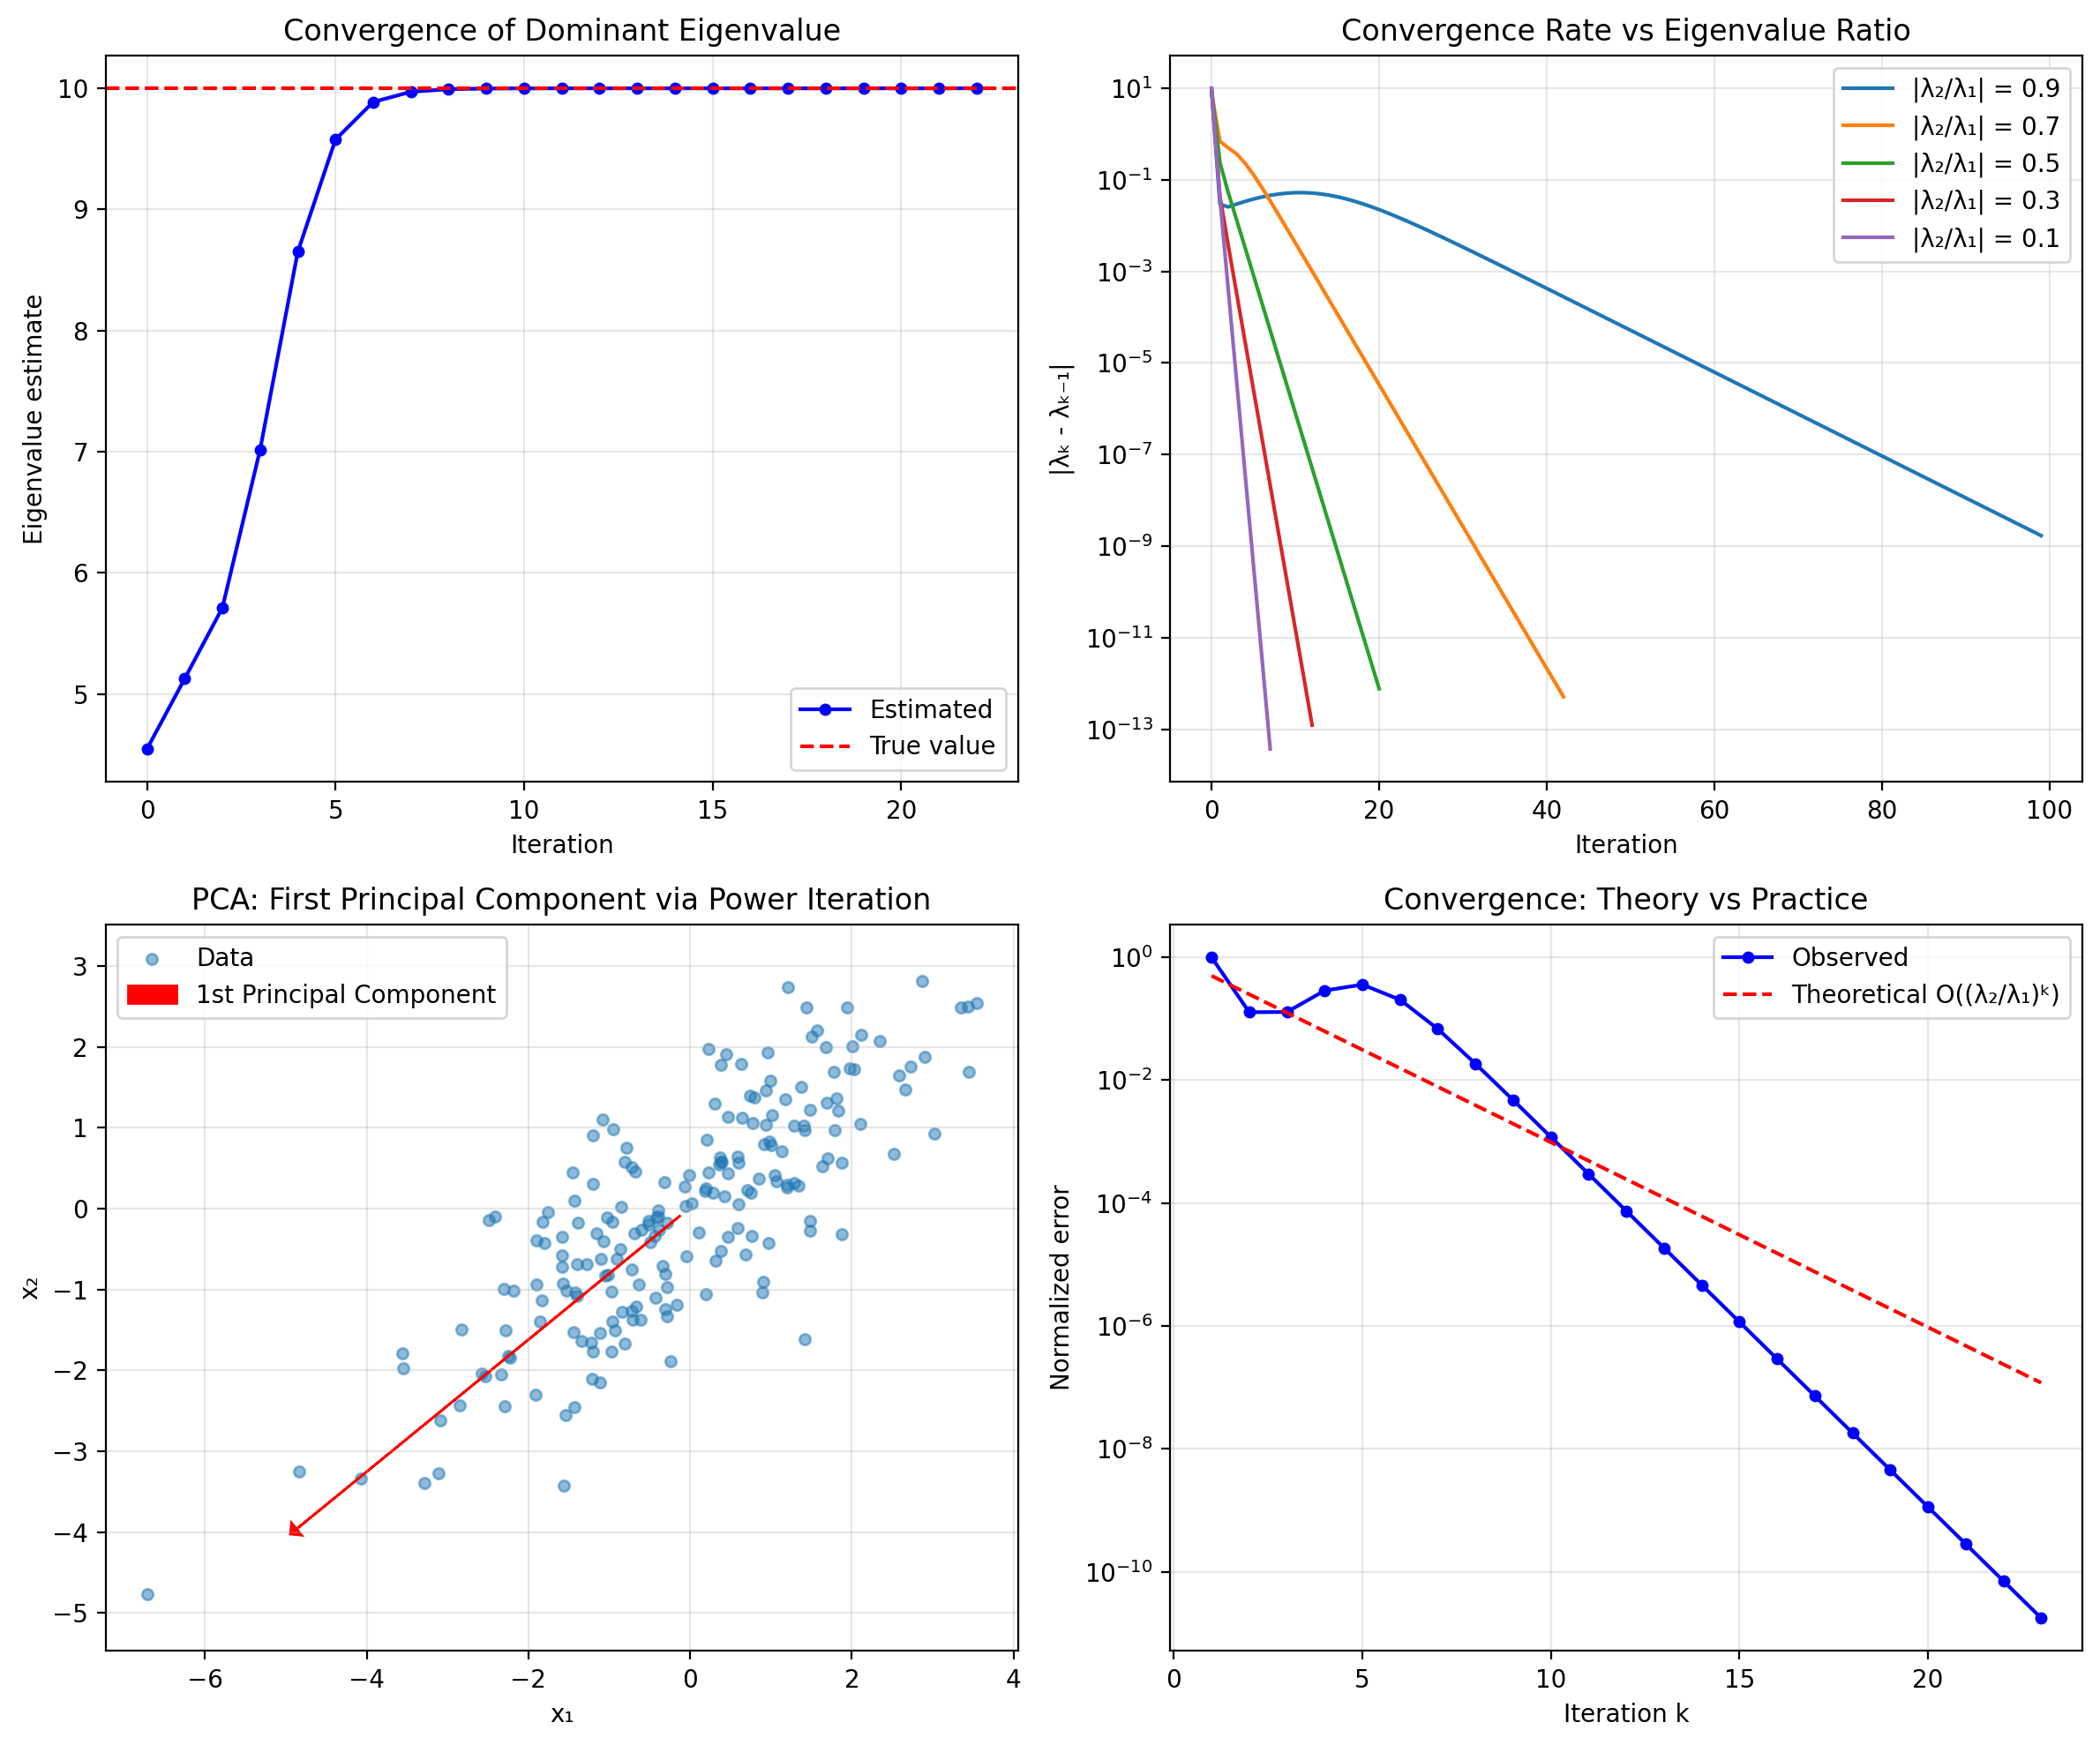


Plot saved to 'plot.png'


In [8]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot 1: Eigenvalue convergence
ax1 = axes[0, 0]
ax1.plot(history['eigenvalues'], 'b-o', markersize=4, label='Estimated')
ax1.axhline(y=eigenvalues_true[0], color='r', linestyle='--', label='True value')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Eigenvalue estimate')
ax1.set_title('Convergence of Dominant Eigenvalue')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Error decay (log scale)
ax2 = axes[0, 1]
for ratio in ratios:
    errors = results[ratio]['errors']
    ax2.semilogy(errors, label=f'|λ₂/λ₁| = {ratio}')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('|λₖ - λₖ₋₁|')
ax2.set_title('Convergence Rate vs Eigenvalue Ratio')
ax2.legend(loc='upper right')
ax2.grid(True, alpha=0.3)

# Plot 3: PCA visualization
ax3 = axes[1, 0]
ax3.scatter(data[:, 0], data[:, 1], alpha=0.5, s=20, label='Data')

# Plot principal direction
origin = data.mean(axis=0)
scale = 3 * np.sqrt(pc1_eigenvalue)
ax3.arrow(origin[0], origin[1], 
          scale*pc1_direction[0], scale*pc1_direction[1],
          head_width=0.2, head_length=0.1, fc='red', ec='red',
          label='1st Principal Component')
ax3.set_xlabel('x₁')
ax3.set_ylabel('x₂')
ax3.set_title('PCA: First Principal Component via Power Iteration')
ax3.legend()
ax3.axis('equal')
ax3.grid(True, alpha=0.3)

# Plot 4: Theoretical vs observed convergence rate
ax4 = axes[1, 1]
theoretical_rate = eigenvalues_true[1] / eigenvalues_true[0]
iterations = np.arange(1, len(history['errors']) + 1)

# Normalize errors for comparison
normalized_errors = np.array(history['errors']) / history['errors'][0]
theoretical_decay = theoretical_rate ** iterations

ax4.semilogy(iterations, normalized_errors, 'b-o', markersize=4, label='Observed')
ax4.semilogy(iterations, theoretical_decay, 'r--', label=f'Theoretical O((λ₂/λ₁)ᵏ)')
ax4.set_xlabel('Iteration k')
ax4.set_ylabel('Normalized error')
ax4.set_title('Convergence: Theory vs Practice')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('power_iteration_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nPlot saved to 'plot.png'")

## Limitations and Extensions

### Limitations

1. **Requires dominant eigenvalue**: The method fails or converges slowly if $|\lambda_1| = |\lambda_2|$
2. **Only finds one eigenvalue**: Cannot directly find other eigenvalues
3. **Sensitive to initial vector**: If $c_1 = 0$, the method converges to the wrong eigenvector

### Extensions

1. **Inverse Power Iteration**: Apply power iteration to $\mathbf{A}^{-1}$ to find the smallest eigenvalue
2. **Shifted Inverse Iteration**: Use $(\mathbf{A} - \sigma\mathbf{I})^{-1}$ to find eigenvalue closest to $\sigma$
3. **Deflation**: Find subsequent eigenvalues by deflating the matrix
4. **QR Algorithm**: Modern method based on repeated power iteration concepts

## Summary

The Power Iteration method is a fundamental algorithm in numerical linear algebra:

- **Simplicity**: Easy to implement and understand
- **Convergence**: Linear convergence with rate $|\lambda_2/\lambda_1|$
- **Applications**: PageRank, PCA, stability analysis
- **Foundation**: Forms the basis for more advanced methods (QR algorithm, Arnoldi iteration)

Despite its limitations, power iteration remains valuable for:
- Large sparse matrices where only the dominant eigenvalue is needed
- Educational purposes to understand eigenvalue computation
- As a building block for more sophisticated algorithms